# THE SPARKS FOUNDATION


# RIYA SHARMA

<b>TASK 2 - PREDICTION USING UNSUPERVISED MACHINE LEARNING
    
<b>OBJECTIVE: PREDICT THE OPTIMUM NUMBER OF CLUSTERS IN THE IRIS DATASET AND REPRESENT IT VISUALLY

In [1]:
#Import necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [3]:
#Load the iris dataset
data = pd.read_csv("Iris.csv")
data

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [8]:
#checking dimensions of dataset

data.shape

(150, 6)

In [9]:
#check for null or missing vaues in data for top 5 entries
data.isnull().head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False


In [7]:
data.isnull().sum()
#there are no null entries present in dataset

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [11]:
#Getting brief description of dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [13]:
#Getting statiscal parameter values for dataset
data.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


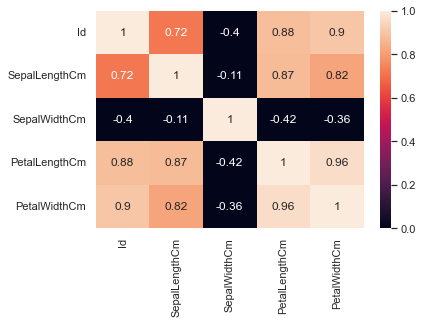

In [15]:
#checking for correlation using heatmap
sns.heatmap(data.corr(),annot=True,vmin=0,vmax=1)
plt.show()

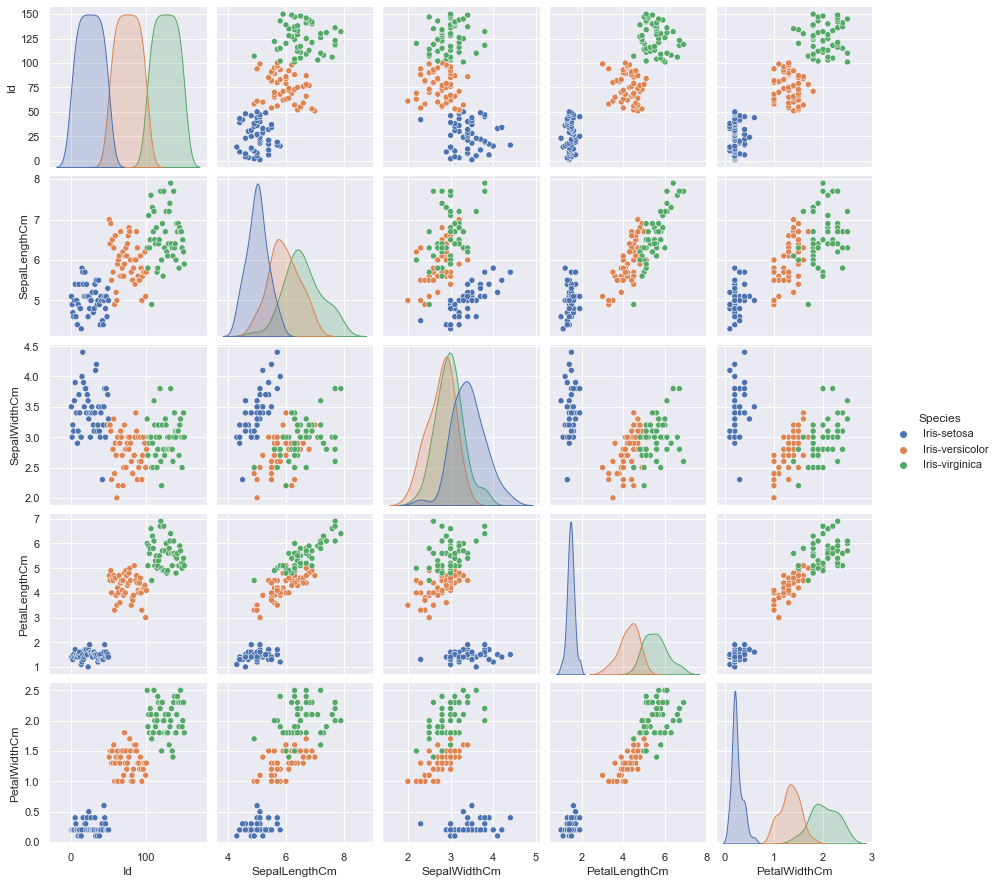

In [17]:
#Using pairplot matrix to visualise all the variables
sns.pairplot(data,hue="Species")
plt.show()

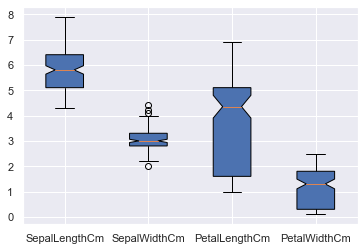

In [21]:
#Checking for outliers using boxplot
SepalLengthCm = data["SepalLengthCm"]
SepalWidthCm = data["SepalWidthCm"]
PetalLengthCm = data["PetalLengthCm"]
PetalWidthCm = data["PetalWidthCm"]

columns = [SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm]

fig,ax = plt.subplots()
ax.boxplot(columns,notch=True,patch_artist=True)
plt.xticks([1,2,3,4],["SepalLengthCm","SepalWidthCm","PetalLengthCm","PetalWidthCm"])
plt.show()
#Clearly sepallengthcm and petallengthcm has the most outliers 

In [23]:
#Outliers treatment for"Sepalengthcm" and "Petallengthcm" using Interquartile range (IQR)
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3-Q1
print(IQR)

Id               74.5
SepalLengthCm     1.3
SepalWidthCm      0.5
PetalLengthCm     3.5
PetalWidthCm      1.5
dtype: float64


In [34]:
# Computing the outliers range beyond upper fence and lower fence and removing them
data = data[~((data<(Q1-1.5*IQR)) | (data>(Q3+1.5*IQR))).any(axis=1)]
data
data.reset_index(drop=True)

C:\Users\HP\AppData\Local\Temp/ipykernel_12332/428987782.py:2: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  data = data[~((data<(Q1-1.5*IQR)) | (data>(Q3+1.5*IQR))).any(axis=1)]


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
141,146,6.7,3.0,5.2,2.3,Iris-virginica
142,147,6.3,2.5,5.0,1.9,Iris-virginica
143,148,6.5,3.0,5.2,2.0,Iris-virginica
144,149,6.2,3.4,5.4,2.3,Iris-virginica


In [28]:
df = data.iloc[:,:4].values

C:\Users\HP\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


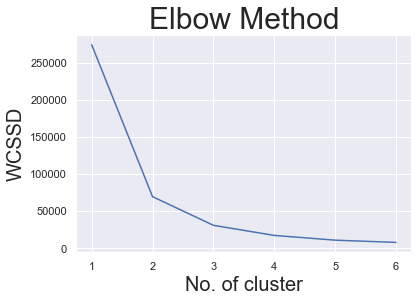

In [30]:
#Perform clustering and fit optimum number of clusters using elbow method
from sklearn.cluster import KMeans

wcssd=[]

for i in range(1,7):
    kmeans = KMeans(i)
    kmeans.fit(df)
    wcssd_iter = kmeans.inertia_
    wcssd.append(wcssd_iter)
    
number_cluster = range(1,7)
plt.plot(number_cluster,wcssd)
plt.title("Elbow Method",fontsize=30)
plt.xlabel("No. of cluster",fontsize=20)
plt.ylabel("WCSSD",fontsize=20)
plt.show()

In [33]:
#Hence 3 is the optimum number of clusters
#Plot the clusters
kmeans = KMeans(3)
kmeans.fit(df)
identified_clusters = kmeans.fit_predict(df)
identified_clusters

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

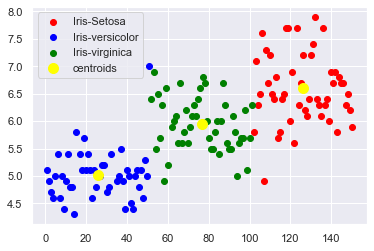

In [36]:
#Graphical representation of clusters
plt.scatter(df[identified_clusters == 0 ,0], df[identified_clusters == 0 ,1],c="Red", label="Iris-Setosa")
plt.scatter(df[identified_clusters == 1 ,0], df[identified_clusters == 1 ,1],c="Blue", label="Iris-versicolor")
plt.scatter(df[identified_clusters == 2 ,0], df[identified_clusters == 2 ,1],c="Green", label="Iris-virginica")
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],s=100, c="yellow",label="centroids")
plt.legend()
plt.show()

# Hence, the optimum number of clusters are round to be 3 and the clusters have been visualised.